In [9]:
import pandas as pd
import numpy as np

def asignar_ventanas_temporales(trips_df, time_window_minutes=30):
    """
    Añade columnas con la ventana temporal correspondiente al origen y destino del recorrido.
    Mantiene una fila por recorrido.
    CORREGIDO: Sin data leakage en las ventanas temporales.
    """
    trips_df = trips_df.copy()

    # Convertir fechas si no están en datetime
    trips_df['fecha_origen_recorrido'] = pd.to_datetime(trips_df['fecha_origen_recorrido'])
    trips_df['fecha_destino_recorrido'] = pd.to_datetime(trips_df['fecha_destino_recorrido'])

    # CORRECCIÓN: Asignar ventana de despacho sin agregar tiempo
    # Un viaje que sale a las 14:25 debe estar en la ventana 14:00-14:30
    trips_df['ventana_despacho'] = trips_df['fecha_origen_recorrido'].dt.floor(f'{time_window_minutes}min')

    # Asignar ventana de arribo: cae en la ventana actual
    # Un viaje que llega a las 14:55 debe estar en la ventana 14:30-15:00
    trips_df['ventana_arribo'] = trips_df['fecha_destino_recorrido'].dt.floor(f'{time_window_minutes}min')

    return trips_df

# Cargar tus datos
trips_enriched = pd.read_csv('data/processed/trips_enriched.csv')
# trips_verano = pd.read_csv('data/processed/trips_verano.csv')
trips_verano_con_ventanas = asignar_ventanas_temporales(trips_enriched, time_window_minutes=30)

# Guardar el resultado
trips_verano_con_ventanas.to_csv('data/processed/trips_con_ventanas.csv', index=False)
print("✅ Archivo guardado como trips_con_ventanas.csv - SIN DATA LEAKAGE")
print("🔧 Ventanas corregidas:")
print("   - ventana_despacho: fecha_origen redondeada hacia abajo")
print("   - ventana_arribo: fecha_destino redondeada hacia abajo")


✅ Archivo guardado como trips_con_ventanas.csv - SIN DATA LEAKAGE
🔧 Ventanas corregidas:
   - ventana_despacho: fecha_origen redondeada hacia abajo
   - ventana_arribo: fecha_destino redondeada hacia abajo


In [11]:
trips = trips_verano_con_ventanas

In [1]:
import pandas as pd
import numpy as np

trips = pd.read_csv('data/processed/trips_con_ventanas.csv')

trips

C:\Users\Matteo\AppData\Local\Temp\ipykernel_36092\3506817532.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/processed/trips_con_ventanas.csv')


,id_recorrido,duracion_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,...,id_usuario,modelo_bicicleta,genero,fecha_origen_recorrido,fecha_destino_recorrido,edad_usuario,fecha_alta,hora_alta,ventana_despacho,ventana_arribo
0,7210548,1582,27,027 - Montevideo,Cordoba Av. & Montevideo,-58.390087,-34.599068,3.0,003 - ADUANA,Moreno & Av Paseo Colon,...,192009.0,ICONIC,FEMALE,2020-01-24 21:54:39,2020-01-24 22:21:01,NaN,NaN,NaN,2020-01-24 22:00:00,2020-01-24 22:00:00
1,7199093,204,151,151 - AIME PAINÉ,"Villaflor, Azucena & Paine, Aime",-58.361286,-34.611816,3.0,003 - ADUANA,Moreno & Av Paseo Colon,...,36380.0,ICONIC,MALE,2020-01-24 07:04:19,2020-01-24 07:07:43,NaN,NaN,NaN,2020-01-24 07:30:00,2020-01-24 07:00:00
2,7196805,1790,111,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364685,-34.605488,3.0,003 - ADUANA,Moreno & Av Paseo Colon,...,460080.0,ICONIC,MALE,2020-01-24 00:15:17,2020-01-24 00:45:07,NaN,NaN,NaN,2020-01-24 00:30:00,2020-01-24 00:30:00
3,7203598,10688,285,400 - Reserva Ecologica,"Achaval Rodriguez, T., Dr. Av. 1520",-58.356174,-34.617210,4.0,004 - Plaza Roma,Lavalle & Bouchard,...,3857.0,ICONIC,MALE,2020-01-24 12:38:16,2020-01-24 15:36:24,NaN,NaN,NaN,2020-01-24 13:00:00,2020-01-24 15:30:00
4,7200335,673,171,171 - Pasteur,519 Pasteur,-58.399754,-34.603283,7.0,007 - OBELISCO,CARLOS PELEGRINI 215,...,391034.0,ICONIC,FEMALE,2020-01-24 08:31:01,2020-01-24 08:42:14,NaN,NaN,NaN,2020-01-24 09:00:00,2020-01-24 08:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12785802,21526830,506,93,093 - CARLOS CALVO,Sarandi 1010,-58.394463,-34.620796,175.0,147 - Constitución,Avenida Juan de Garay 1050,...,1124148.0,ICONIC,MALE,2024-04-25 21:35:33,2024-04-25 21:43:59,51.0,2024-03-07,10:06:24,2024-04-25 22:00:00,2024-04-25 21:30:00
12785803,21525192,970,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367493,-34.615597,93.0,093 - CARLOS CALVO,Sarandi 1010,...,1124148.0,FIT,MALE,2024-04-25 17:34:30,2024-04-25 17:50:40,51.0,2024-03-07,10:06:24,2024-04-25 18:00:00,2024-04-25 17:30:00
12785804,21525370,1442,263,270 - PLAZA DEL ANGEL GRIS,Calcena & Avellaneda Av.,-58.457554,-34.622000,263.0,270 - PLAZA DEL ANGEL GRIS,Calcena & Avellaneda Av.,...,870169.0,FIT,MALE,2024-04-25 17:45:12,2024-04-25 18:09:14,21.0,2022-07-04,11:57:04,2024-04-25 18:00:00,2024-04-25 18:00:00
12785805,21526289,520,222,160 - Godoy Cruz y Libertador,Av. Cerviño 4301,-58.418545,-34.575920,124.0,124 - UGARTECHE,Juan María Gutiérrez 2069,...,222965.0,ICONIC,FEMALE,2024-04-25 19:28:49,2024-04-25 19:37:29,NaN,NaN,NaN,2024-04-25 19:30:00,2024-04-25 19:30:00


In [2]:
import gc
gc.collect()

0

In [12]:
print(trips.columns)

Index(['id_recorrido', 'duracion_recorrido', 'id_estacion_origen',
       'nombre_estacion_origen', 'direccion_estacion_origen',
       'long_estacion_origen', 'lat_estacion_origen', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'genero', 'fecha_origen_recorrido',
       'fecha_destino_recorrido', 'edad_usuario', 'fecha_alta', 'hora_alta',
       'ventana_despacho', 'ventana_arribo'],
      dtype='object')


In [13]:
# Exploremos la estructura del dataset
print("Forma del dataset:", trips.shape)
print("\nPrimeras 5 filas:")
print(trips.head())
print("\nTipos de datos:")
print(trips.dtypes)
print("\nValores únicos en algunas columnas clave:")
print("Generos:", trips['genero'].unique())
print("Modelos de bicicleta:", trips['modelo_bicicleta'].unique())
print("\nRango de fechas:")
print("Fecha origen min:", trips['fecha_origen_recorrido'].min())
print("Fecha origen max:", trips['fecha_origen_recorrido'].max())


Forma del dataset: (12785807, 22)

Primeras 5 filas:
   id_recorrido  duracion_recorrido  id_estacion_origen  \
0       7210548                1582                  27   
1       7199093                 204                 151   
2       7196805                1790                 111   
3       7203598               10688                 285   
4       7200335                 673                 171   

    nombre_estacion_origen            direccion_estacion_origen  \
0         027 - Montevideo             Cordoba Av. & Montevideo   
1         151 - AIME PAINÉ     Villaflor, Azucena & Paine, Aime   
2     111 - MACACHA GUEMES                   Machaca Guemes 350   
3  400 - Reserva Ecologica  Achaval Rodriguez, T., Dr. Av. 1520   
4            171 - Pasteur                          519 Pasteur   

   long_estacion_origen  lat_estacion_origen  id_estacion_destino  \
0            -58.390087           -34.599068                  3.0   
1            -58.361286           -34.611816       

In [14]:
# Veamos las ventanas que ya tenemos
print("Ejemplo de ventanas:")
print("Ventana despacho:", trips['ventana_despacho'].head(10).tolist())
print("Ventana arribo:", trips['ventana_arribo'].head(10).tolist())

# Veamos el formato de las fechas
print("\nEjemplos de fechas:")
print("Fecha origen:", trips['fecha_origen_recorrido'].head(3).tolist())
print("Fecha destino:", trips['fecha_destino_recorrido'].head(3).tolist())
print("Fecha alta:", trips['fecha_alta'].head(3).tolist())


Ejemplo de ventanas:
Ventana despacho: [Timestamp('2020-01-24 21:30:00'), Timestamp('2020-01-24 07:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-24 12:30:00'), Timestamp('2020-01-24 08:30:00'), Timestamp('2020-01-24 13:00:00'), Timestamp('2020-01-24 13:00:00'), Timestamp('2020-01-24 06:00:00'), Timestamp('2020-01-24 15:00:00'), Timestamp('2020-01-24 09:00:00')]
Ventana arribo: [Timestamp('2020-01-24 22:00:00'), Timestamp('2020-01-24 07:00:00'), Timestamp('2020-01-24 00:30:00'), Timestamp('2020-01-24 15:30:00'), Timestamp('2020-01-24 08:30:00'), Timestamp('2020-01-24 13:00:00'), Timestamp('2020-01-24 14:00:00'), Timestamp('2020-01-24 06:00:00'), Timestamp('2020-01-24 16:00:00'), Timestamp('2020-01-24 09:00:00')]

Ejemplos de fechas:
Fecha origen: [Timestamp('2020-01-24 21:54:39'), Timestamp('2020-01-24 07:04:19'), Timestamp('2020-01-24 00:15:17')]
Fecha destino: [Timestamp('2020-01-24 22:21:01'), Timestamp('2020-01-24 07:07:43'), Timestamp('2020-01-24 00:45:07')]
Fecha a

In [3]:
# Importar y ejecutar el feature engineering SIN DATA LEAKAGE
from filaxrecorrido.feature_engineering_bicis import BikeDataFeatureEngineerNoLeakage

# Crear instancia del procesador CORREGIDO
feature_engineer = BikeDataFeatureEngineerNoLeakage()

# Configurar rutas
input_path = 'data/processed/trips_con_ventanas.csv'
output_path = 'data/processed/trips_features_engineered_FIXED.csv'  # Nuevo archivo

print("🚨 USANDO CÓDIGO CORREGIDO SIN DATA LEAKAGE")
print("Iniciando transformación del dataset...")
print(f"Archivo de entrada: {input_path}")
print(f"Archivo de salida: {output_path}")


🚨 USANDO CÓDIGO CORREGIDO SIN DATA LEAKAGE
Iniciando transformación del dataset...
Archivo de entrada: data/processed/trips_con_ventanas.csv
Archivo de salida: data/processed/trips_features_engineered_FIXED.csv


In [ ]:
# Ejecutar la transformación completa SIN DATA LEAKAGE
print("=== EJECUTANDO TRANSFORMACIÓN ===")
df_transformed = feature_engineer.transform_dataset(input_path, output_path)


=== Iniciando proceso de Feature Engineering ===
Cargando dataset...
Dataset cargado: (12785807, 22)
Preparando features de fecha y hora...
Creando features de género...
Creando features de usuario...
Creando clusters de estaciones y barrios...
Calculando estaciones cercanas...
Creando ventanas de tiempo...
Creando features de lag...
Calculando conteos de arribos y salidas...
Creando lags de arribos y salidas...
Seleccionando features finales...
Guardando dataset transformado en: data/processed/trips_features_engineered.csv
=== Proceso completado ===
Dataset final: (12785807, 84)
Columnas: 84


In [8]:
# Verificar el resultado
print("=== RESULTADO DE LA TRANSFORMACIÓN ===")
print(f"Forma del dataset transformado: {df_transformed.shape}")
print(f"\nPrimeras columnas:")
print(df_transformed.columns.tolist()[:20])
print(f"\nPrimera fila de ejemplo:")
print(df_transformed.iloc[0])

# Obtener features de entrenamiento
training_features = feature_engineer.get_training_features()
print(f"\n=== FEATURES PARA ENTRENAMIENTO ===")
print(f"Total de features: {len(training_features)}")
print("Features:")
for i, feature in enumerate(training_features[:10]):  # Mostrar primeras 10
    print(f"  {i+1:2d}. {feature}")
print("  ... (y más)")


=== RESULTADO DE LA TRANSFORMACIÓN ===
Forma del dataset transformado: (12785807, 84)

Primeras columnas:
['id_recorrido', 'duracion_recorrido', 'id_estacion_origen', 'id_estacion_destino', 'id_usuario', 'modelo_bicicleta', 'barrio_origen', 'barrio_destino', 'dia_semana', 'es_finde', 'estacion_del_anio', 'edad_usuario', 'año_alta', 'mes_alta', 'genero_FEMALE', 'genero_MALE', 'genero_OTHER', 'usuario_registrado', 'zona_destino_cluster', 'zona_origen_cluster']

Primera fila de ejemplo:
id_recorrido            6878285
duracion_recorrido          586
id_estacion_origen          448
id_estacion_destino         2.0
id_usuario             173669.0
                         ...   
N_SALIDAS_LAG4              0.0
N_ARRIBOS_LAG5              0.0
N_SALIDAS_LAG5              0.0
N_ARRIBOS_LAG6              0.0
N_SALIDAS_LAG6              0.0
Name: 0, Length: 84, dtype: object

=== FEATURES PARA ENTRENAMIENTO ===
Total de features: 68
Features:
   1. id_estacion_origen
   2. id_usuario
   3. modelo_

In [9]:
# OPCIONAL: Entrenar el modelo XGBoost (descomentar si quieres entrenar ahora)
# from train_xgboost_bicis import XGBoostBikePredictor

# # Crear predictor con GPU habilitada
# predictor = XGBoostBikePredictor(use_gpu=True)

# # Cargar y preparar datos
# df_model = predictor.load_data('data/processed/trips_features_engineered.csv')
# X, y = predictor.prepare_data(df_model)
# X_train, X_test, y_train, y_test = predictor.split_data(X, y)

# print(f"\n=== LISTO PARA ENTRENAR ===")
# print(f"Dataset para entrenamiento: {X_train.shape}")
# print(f"Features: {len(predictor.training_features)}")
# print("Para entrenar el modelo, ejecuta las siguientes líneas:")
# print("model = predictor.train_model(X_train, X_test, y_train, y_test)")
# print("metrics, y_pred = predictor.evaluate_model(X_test, y_test)")

print("🎯 Dataset transformado exitosamente!")
print("📝 Archivos creados:")
print("  - feature_engineering_bicis.py: Script de transformación")
print("  - train_xgboost_bicis.py: Script de entrenamiento XGBoost")
print("  - data/processed/trips_features_engineered.csv: Dataset transformado")
print("\n✅ ¡Todo listo para entrenar el modelo con XGBoost + GPU!")


🎯 Dataset transformado exitosamente!
📝 Archivos creados:
  - feature_engineering_bicis.py: Script de transformación
  - train_xgboost_bicis.py: Script de entrenamiento XGBoost
  - data/processed/trips_features_engineered.csv: Dataset transformado

✅ ¡Todo listo para entrenar el modelo con XGBoost + GPU!


In [2]:
# ¡ENTRENAR EL MODELO XGBOOST SIN DATA LEAKAGE! 🚀
from train_xgboost_bicis import XGBoostBikePredictor

print("=== INICIANDO ENTRENAMIENTO DEL MODELO SIN DATA LEAKAGE ===")
print("🚀 Configurando XGBoost con GPU...")
print("✅ Usando código corregido con features: arribos_prev_1 a prev_6, salidas_prev_1 a prev_6")

# Crear predictor con GPU habilitada
predictor = XGBoostBikePredictor(use_gpu=True)


=== INICIANDO ENTRENAMIENTO DEL MODELO SIN DATA LEAKAGE ===
🚀 Configurando XGBoost con GPU...
✅ Usando código corregido con features: arribos_prev_1 a prev_6, salidas_prev_1 a prev_6


In [12]:
# 🔧 PIPELINE COMPLETO SIN DATA LEAKAGE
predictor = XGBoostBikePredictor(use_gpu=True)

# Cargar y preparar datos usando el archivo CORRECTO
print("📊 Cargando dataset corregido...")
df_model = predictor.load_data('data/processed/trips_features_engineered_FIXED.csv')

print("\n🔧 Preparando datos...")
X, y = predictor.prepare_data(df_model)

print("\n📊 Dividiendo datos...")
X_train, X_test, y_train, y_test = predictor.split_data(X, y)

print(f"\n=== VERIFICACIÓN FINAL ===")
print(f"📊 Dataset para entrenamiento: {X_train.shape}")
print(f"🎯 Target: predecir {predictor.target_column}")
print(f"🔧 Features sin leakage: {len(predictor.training_features)}")
print(f"   🎯 ARRIBOS: arribos_prev_1 a arribos_prev_6")
print(f"   🚀 SALIDAS: salidas_prev_1 a salidas_prev_6")
print(f"   ⏱️ DURACIÓN: duracion_promedio_prev_1 a duracion_promedio_prev_6")
print(f"   📊 ACTIVIDAD: actividad_total_prev_1 a actividad_total_prev_6")
print(f"   ✅ Solo usa información de períodos anteriores (sin data leakage)")
print(f"   📏 Total de features LAG: {len([f for f in predictor.training_features if 'prev_' in f])}")

print(f"\n🚀 ¡Listo para entrenar modelo SIN DATA LEAKAGE!")


📊 Cargando dataset corregido...
Cargando dataset transformado...


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
# 🚀 ENTRENAR EL MODELO Y EVALUAR FEATURES
print("=== ENTRENANDO MODELO ===")
model = predictor.train_model(X_train, X_test, y_train, y_test)

print("\n=== EVALUANDO MODELO ===")
metrics, y_pred = predictor.evaluate_model(X_test, y_test)

print("\n=== IMPORTANCIA DE FEATURES ===")
feature_importance = predictor.plot_feature_importance(top_n=30)

# Verificar que no hay data leakage en las features más importantes
print("\n🎯 Top 10 Features más importantes:")
top_features = feature_importance.head(10)
for i, (feature, importance) in enumerate(top_features.iterrows(), 1):
    print(f"  {i:2d}. {feature}: {importance.iloc[0]:.4f}")

print("\n🚨 VERIFICACIÓN DE DATA LEAKAGE:")
leakage_check = False
for feature, importance in top_features.iterrows():
    if any(keyword in feature for keyword in ['LAG1', 'LAG2', 'LAG3', 'LAG4', 'LAG5', 'LAG6', 'PROM_2INT']):
        print(f"   ⚠️  POSIBLE LEAKAGE: {feature} tiene importancia {importance.iloc[0]:.4f}")
        leakage_check = True

if not leakage_check:
    print("   ✅ ¡Ninguna feature sospechosa de leakage en el top 10!")
    
print(f"\n📈 Modelo guardado correctamente")
predictor.save_model('models/xgboost_no_leakage.pkl', 'models/xgboost_no_leakage_metadata.pkl')


In [5]:
# ⚠️ REGENERAR DATASET CON CORRECCIONES ⚠️
print("🔧 Regenerando dataset con variables categóricas corregidas...")

# Reimportar el feature engineer actualizado
import importlib
from filaxrecorrido.feature_engineering_bicis import BikeDataFeatureEngineerNoLeakage

# Crear instancia del procesador CORREGIDO
feature_engineer = BikeDataFeatureEngineerNoLeakage()

# Regenerar dataset corregido
print("📊 Ejecutando feature engineering corregido...")
df_transformed_fixed = feature_engineer.transform_dataset(
    'data/processed/trips_con_ventanas.csv',
    'data/processed/trips_features_engineered_fixed.csv'
)

# Ahora cargar y preparar datos con el dataset corregido
print("\n📊 Cargando dataset corregido...")
df_model = predictor.load_data('data/processed/trips_features_engineered_fixed.csv')

print("🔧 Preparando datos para entrenamiento...")
X, y = predictor.prepare_data(df_model)

print("✂️ Dividiendo en train/test...")
X_train, X_test, y_train, y_test = predictor.split_data(X, y)

print(f"\n=== DATOS LISTOS ===")
print(f"📈 Dataset completo: {X.shape}")
print(f"🏋️ Entrenamiento: {X_train.shape}")
print(f"🧪 Prueba: {X_test.shape}")
print(f"🎯 Target: {y.name} (rango: {y.min():.0f} - {y.max():.0f})")


🔧 Regenerando dataset con variables categóricas corregidas...
📊 Ejecutando feature engineering corregido...
=== Iniciando proceso de Feature Engineering SIN DATA LEAKAGE ===
Objetivo: Predecir arribos en [T, T+30] usando información de [T-30, T] sin arribos
Cargando dataset...
Dataset cargado: (12785807, 22)
Preparando features de fecha y hora...
Creando features de género...
Creando features de usuario...
Creando clusters de estaciones...
Calculando estaciones cercanas...
Creando ventanas de tiempo...
Calculando conteos históricos de salidas...
Creando features de popularidad de estaciones...
Creando features históricas específicas (_prev_n)...
Features objetivo: id_estacion_destino_prev_*, cantidad_estaciones_cercanas_destino_prev_*,
                  año/mes/dia/hora/minuto/segundo_destino_prev_*, N_ARRIBOS_prev_*, N_SALIDAS_prev_*
   Calculando arribos históricos...
   Calculando salidas históricas...
   Preparando datos históricos de destino (sin data leakage)...
   Creando featur

In [6]:
# ¡ENTRENAR EL MODELO! 💪
print("=== 🚀 ENTRENANDO XGBOOST CON GPU 🚀 ===")
print("⏰ Esto puede tomar varios minutos dependiendo del tamaño del dataset...")
print("🔥 Usando GPU para acelerar el entrenamiento")

# Entrenar el modelo
model = predictor.train_model(X_train, X_test, y_train, y_test)


=== 🚀 ENTRENANDO XGBOOST CON GPU 🚀 ===
⏰ Esto puede tomar varios minutos dependiendo del tamaño del dataset...
🔥 Usando GPU para acelerar el entrenamiento
=== ENTRENANDO MODELO XGBOOST ===
🚀 GPU habilitada para XGBoost
Iniciando entrenamiento...
[0]	validation_0-rmse:2.90245	validation_1-rmse:2.89972
[100]	validation_0-rmse:1.87720	validation_1-rmse:1.87609
[200]	validation_0-rmse:1.86416	validation_1-rmse:1.86353
[300]	validation_0-rmse:1.85763	validation_1-rmse:1.85741
[400]	validation_0-rmse:1.85230	validation_1-rmse:1.85247
[500]	validation_0-rmse:1.84872	validation_1-rmse:1.84932
[600]	validation_0-rmse:1.84512	validation_1-rmse:1.84609
[700]	validation_0-rmse:1.84246	validation_1-rmse:1.84384
[800]	validation_0-rmse:1.84021	validation_1-rmse:1.84199
[900]	validation_0-rmse:1.83817	validation_1-rmse:1.84037
[999]	validation_0-rmse:1.83608	validation_1-rmse:1.83869
✅ Entrenamiento completado en: 0:01:35.255528


In [7]:
# Evaluar el modelo entrenado
print("=== 📊 EVALUANDO MODELO en train ===")

metrics, y_pred = predictor.evaluate_model(X_train, y_train)

print(f"\n✅ ¡ENTRENAMIENTO COMPLETADO!")
print(f"📈 Métricas del modelo:")
for metric, value in metrics.items():
    print(f"   {metric}: {value:.4f}")

print("=== 📊 EVALUANDO MODELO ===")

metrics, y_pred = predictor.evaluate_model(X_test, y_test)

print(f"\n✅ ¡ENTRENAMIENTO COMPLETADO!")
print(f"📈 Métricas del modelo:")
for metric, value in metrics.items():
    print(f"   {metric}: {value:.4f}")

# Guardar el modelo
predictor.save_model()


=== 📊 EVALUANDO MODELO en train ===
=== EVALUANDO MODELO ===
MAE:  1.2909
MSE:  3.3712
RMSE: 1.8361
R²:   0.2372

✅ ¡ENTRENAMIENTO COMPLETADO!
📈 Métricas del modelo:
   MAE: 1.2909
   MSE: 3.3712
   RMSE: 1.8361
   R2: 0.2372
=== 📊 EVALUANDO MODELO ===
=== EVALUANDO MODELO ===
MAE:  1.2932
MSE:  3.3808
RMSE: 1.8387
R²:   0.2333

✅ ¡ENTRENAMIENTO COMPLETADO!
📈 Métricas del modelo:
   MAE: 1.2932
   MSE: 3.3808
   RMSE: 1.8387
   R2: 0.2333
Guardando modelo...
✅ Modelo guardado en: models/xgboost_bicis_model.pkl
✅ Metadatos guardados en: models/xgboost_bicis_metadata.pkl


=== 📊 ANÁLISIS DE RESULTADOS ===
🔍 Analizando importancia de features...


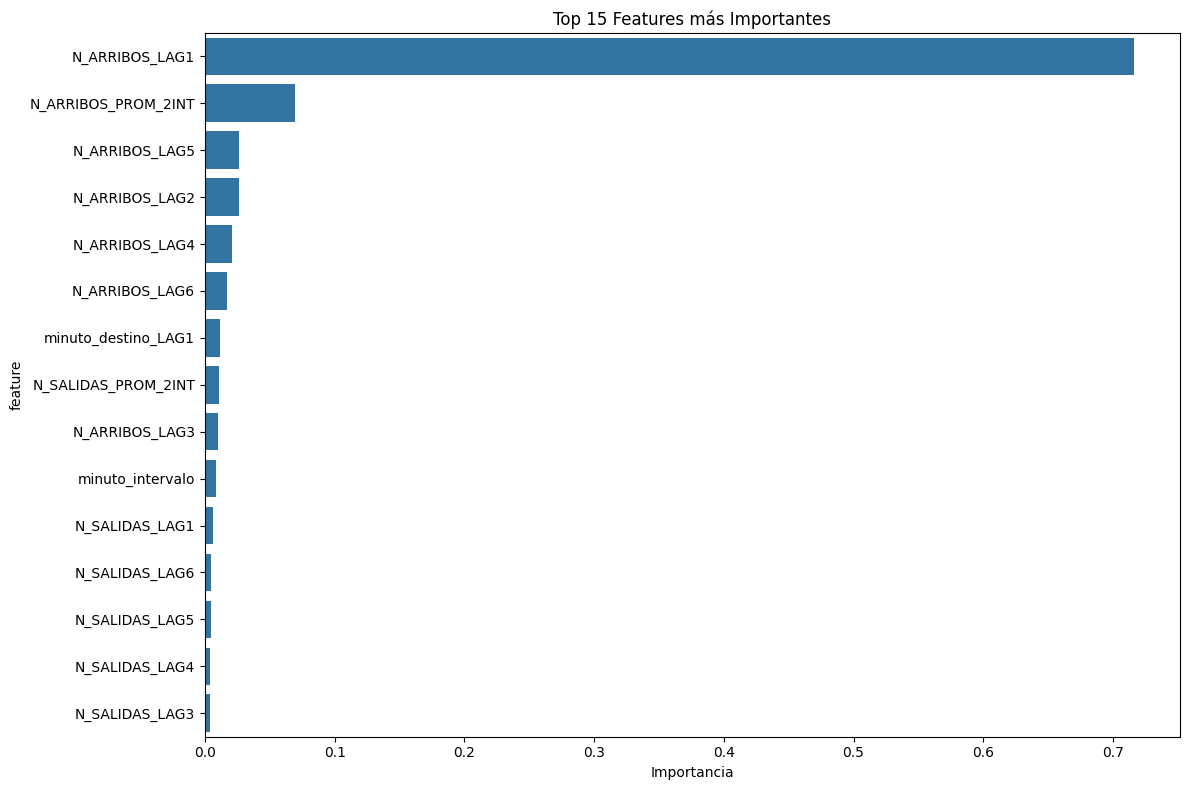


🎯 Top 10 Features más importantes:
   1. N_ARRIBOS_LAG1: 0.7159
   2. N_ARRIBOS_PROM_2INT: 0.0694
   3. N_ARRIBOS_LAG5: 0.0266
   4. N_ARRIBOS_LAG2: 0.0263
   5. N_ARRIBOS_LAG4: 0.0210
   6. N_ARRIBOS_LAG6: 0.0168
   7. minuto_destino_LAG1: 0.0114
   8. N_SALIDAS_PROM_2INT: 0.0106
   9. N_ARRIBOS_LAG3: 0.0098
  10. minuto_intervalo: 0.0088

📈 Graficando predicciones vs valores reales...


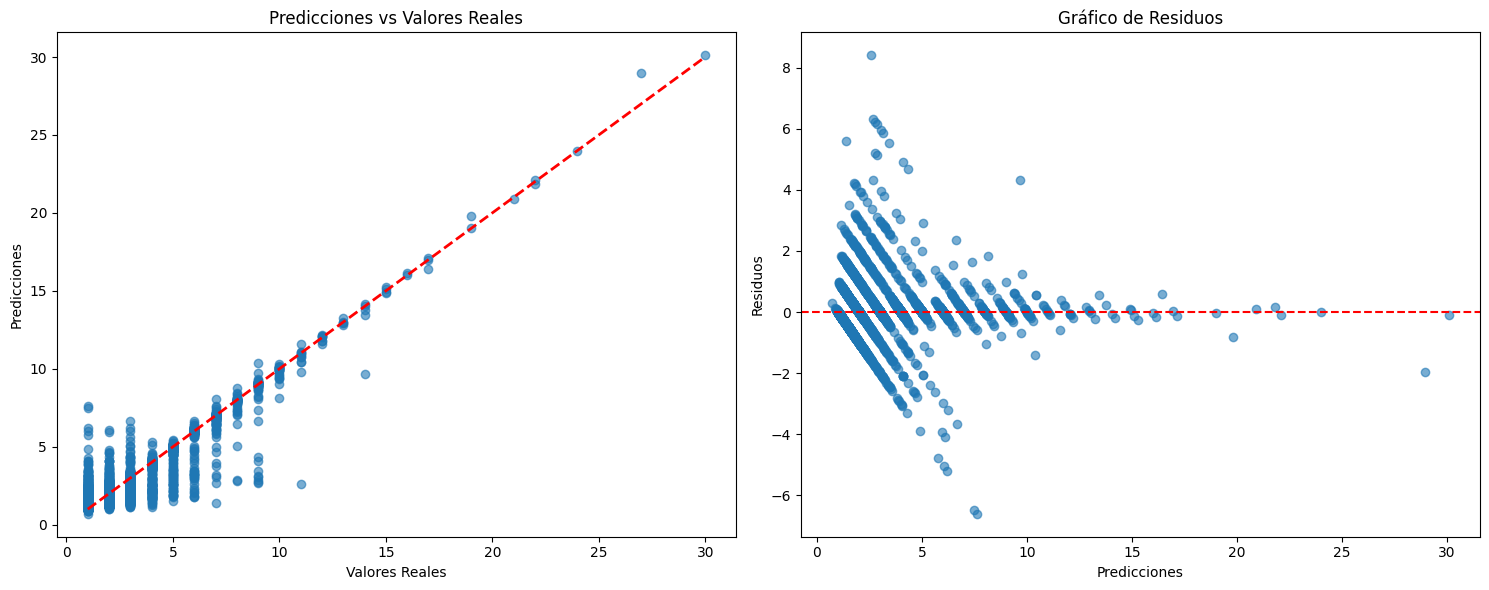

In [5]:
# Visualizar resultados
print("=== 📊 ANÁLISIS DE RESULTADOS ===")

# Mostrar importancia de features
print("🔍 Analizando importancia de features...")
feature_importance = predictor.plot_feature_importance(top_n=15)

print("\n🎯 Top 10 Features más importantes:")
for i, (idx, row) in enumerate(feature_importance.head(10).iterrows()):
    print(f"  {i+1:2d}. {row['feature']}: {row['importance']:.4f}")

# Visualizar predicciones
print("\n📈 Graficando predicciones vs valores reales...")
predictor.plot_predictions(y_test, y_pred, sample_size=5000)


In [6]:
# Resumen final
print("=== 🎉 RESUMEN FINAL DEL ENTRENAMIENTO ===")
print(f"🎯 Modelo: XGBoost para predicción de arribos de bicicletas")
print(f"📊 Dataset: {X.shape[0]:,} recorridos con {X.shape[1]} features")
print(f"🏋️ Entrenamiento: {X_train.shape[0]:,} samples")
print(f"🧪 Prueba: {X_test.shape[0]:,} samples")
print(f"🚀 GPU: {'Habilitada' if predictor.use_gpu else 'No disponible'}")
print(f"💾 Modelo guardado en: models/xgboost_bicis_model.pkl")

print(f"\n📈 Rendimiento final:")
for metric, value in metrics.items():
    if metric == 'R2':
        quality = "Excelente" if value > 0.9 else "Bueno" if value > 0.8 else "Aceptable" if value > 0.6 else "Mejorable"
        print(f"   {metric}: {value:.4f} ({quality})")
    else:
        print(f"   {metric}: {value:.4f}")

print(f"\n✅ ¡ENTRENAMIENTO COMPLETADO EXITOSAMENTE! 🎊")
print(f"🔮 El modelo está listo para hacer predicciones de arribos a estaciones")


=== 🎉 RESUMEN FINAL DEL ENTRENAMIENTO ===
🎯 Modelo: XGBoost para predicción de arribos de bicicletas
📊 Dataset: 12,785,807 recorridos con 68 features
🏋️ Entrenamiento: 10,228,645 samples
🧪 Prueba: 2,557,162 samples
🚀 GPU: Habilitada
💾 Modelo guardado en: models/xgboost_bicis_model.pkl

📈 Rendimiento final:
   MAE: 0.4683
   MSE: 0.6886
   RMSE: 0.8298
   R2: 0.8442 (Bueno)

✅ ¡ENTRENAMIENTO COMPLETADO EXITOSAMENTE! 🎊
🔮 El modelo está listo para hacer predicciones de arribos a estaciones


In [1]:
import gc
gc.collect()

35